In [108]:
import pandas as pd
pd.show_versions()
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.9.1.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : pt_BR.cp1252

pandas           : 1.2.4
numpy            : 1.20.1
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 49.2.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.21.0
pandas_datareader: None
bs4              : None
bottleneck       : None
fsspec           : No

In [2]:
all_data = pd.DataFrame()
for f in glob.glob("./RelatorioQualidadeAguasSuperficiais*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

In [3]:
all_data

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação
0,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,10/03/2011,09:55,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
1,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,19/05/2011,11:05,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,20/07/2011,09:40,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
3,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,01/09/2011,10:40,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
4,01/02/2011,01/02/2016,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,30/11/2011,11:20,pH,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Chuvas nas últimas 24h,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2529,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Benzeno,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2530,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Ens. Ecotoxic. c/ Vibrio fischeri,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N
2531,22/04/2016,22/04/2021,120,Rede Básica,06 - ALTO TIÊTE,TAMT04900,Ativo,06/10/2020,15:12,Carbono Orgânico Total,...,Classe 4,SÃO PAULO,SP,01/01/1977,NaN,23 31 36,46 37 56,700,"Ponte na Av. Santos Dumont, em frente à Secret...",N


In [4]:
all_data['Parametro'].value_counts()

Condutividade                              56
pH                                         56
Fósforo Total                              56
Sólido Dissolvido Total                    56
Turbidez                                   56
Coloração                                  56
Carbono Orgânico Total                     56
Cloreto Total                              56
Temperatura do Ar                          56
Sólido Total                               56
Oxigênio Dissolvido                        56
Temperatura da Água                        56
Nitrogênio-Nitrato                         56
Nitrogênio Amoniacal                       56
Chuvas nas últimas 24h                     56
Ens. Ecotoxic. c/ Vibrio fischeri          56
Nitrogênio-Nitrito                         55
Bário Total                                54
Crômio Total                               54
Cádmio Total                               54
Zinco Total                                54
Sódio                             

In [138]:
clean_data = all_data.drop(columns=['Cod_Interaguas', 'Código Ponto', 'Status Ponto', 'Tipo Rede', 'Período DE', 'Período ATE', 'CLASSE', 'Inicio Operação', 'UF', 'Fim Operação', 'Latitude', 'Longitude', 'Captação', 'Localização', 'Município', 'Tipo de Sistema Hídrico', 'UGRHI', 'Sistema Hídrico', 'Altitude', 'Sinal'])
clean_data['Valor'] = clean_data['Valor'].str.replace(',','.')
res = clean_data[pd.to_numeric(clean_data['Valor'], errors='coerce').notnull()]
res['Valor'] = res['Valor'].astype(float)

<ipython-input-138-03d3bd4c5b62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Valor'] = res['Valor'].astype(float)


In [143]:
list_IQA = ['pH', 'Fósforo Total', 'DBO (5, 20)', 'Oxigênio Dissolvido', 'Temperatura da Água', 'Nitrogênio Total', 'Fósforo Total', 'Turbidez', 'Sólido Total']
IQA_table = res[res['Parametro'].isin(list_IQA)]

,Data Coleta,Hora Coleta,Parametro,Valor,Unidade,Tipo Parâmetro
0,10/03/2011,09:55,pH,7.40,U.pH,3- Químicos
1,19/05/2011,11:05,pH,7.00,U.pH,3- Químicos
2,20/07/2011,09:40,pH,7.20,U.pH,3- Químicos
3,01/09/2011,10:40,pH,7.20,U.pH,3- Químicos
4,30/11/2011,11:20,pH,7.30,U.pH,3- Químicos
...,...,...,...,...,...,...
2484,06/10/2020,15:12,pH,7.10,U.pH,3- Químicos
2496,06/10/2020,15:12,Turbidez,72.00,UNT,2- Físicos
2503,06/10/2020,15:12,Oxigênio Dissolvido,0.21,mg/L,3- Químicos
2506,06/10/2020,15:12,Sólido Total,390.00,mg/L,2- Físicos


In [133]:
pH_table = res[res["Parametro"] == 'pH']
coli_termo_table = res[res["Parametro"] == 'Coliformes Termotolerantes']
O2_table = res[res["Parametro"] == 'Oxigênio Dissolvido']
EcoTox_table = res[res["Parametro"] == 'Ens. Ecotoxic. c/ Vibrio fischeri']
Turbidez_table = res[res["Parametro"] == 'Turbidez']
table_list = []
table_list.extend((pH_table, Mg_table, C_table, EcoTox_table, Benzeno_table))

In [ ]:
sns.set_theme()
sns.relplot(
    data=res,
    x="Data Coleta", y="Valor", col="Parametro", size=100)
#plt.plot(pH_table['Data Coleta'], pH_table['Valor'])

In [ ]:
sns.relplot(
    data=Mg_table, kind="line",
    x="Data Coleta", y="Valor", col="Parametro",
    size=1000,
    facet_kws=dict(sharex=False),
)

In [ ]:
fig, axes = plt.subplots(1, 2)
sns.set(font_scale=0.8)
sns.relplot(
    data=C_table, kind="line", ax=axes[0],
    x="Data Coleta", y="Valor", col="Parametro", size=100)

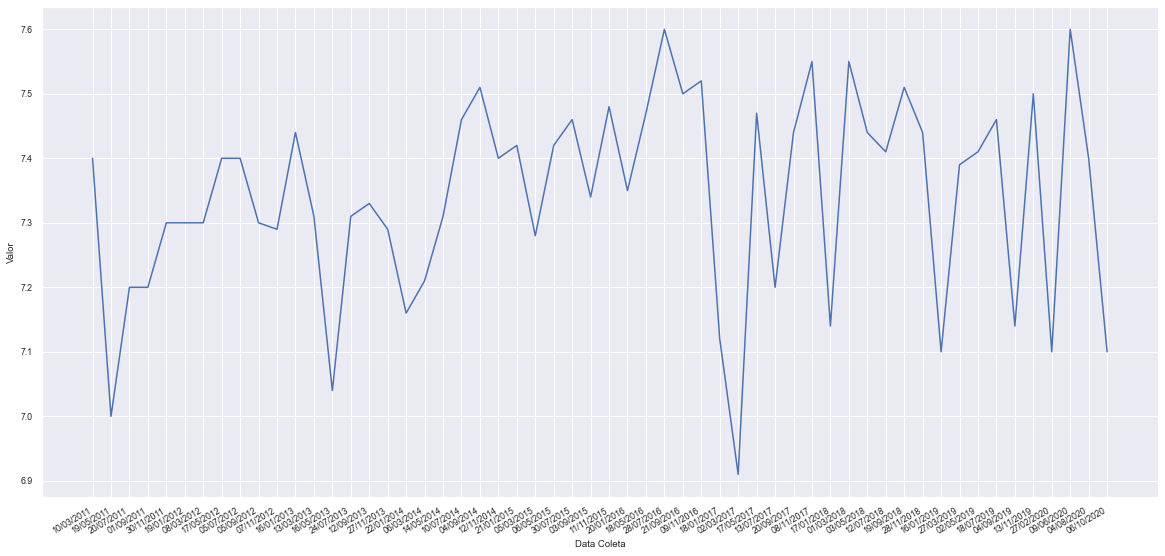

In [127]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.lineplot(
    data=pH_table,
    x="Data Coleta", y="Valor")
plt.gcf().autofmt_xdate()
plt.show()

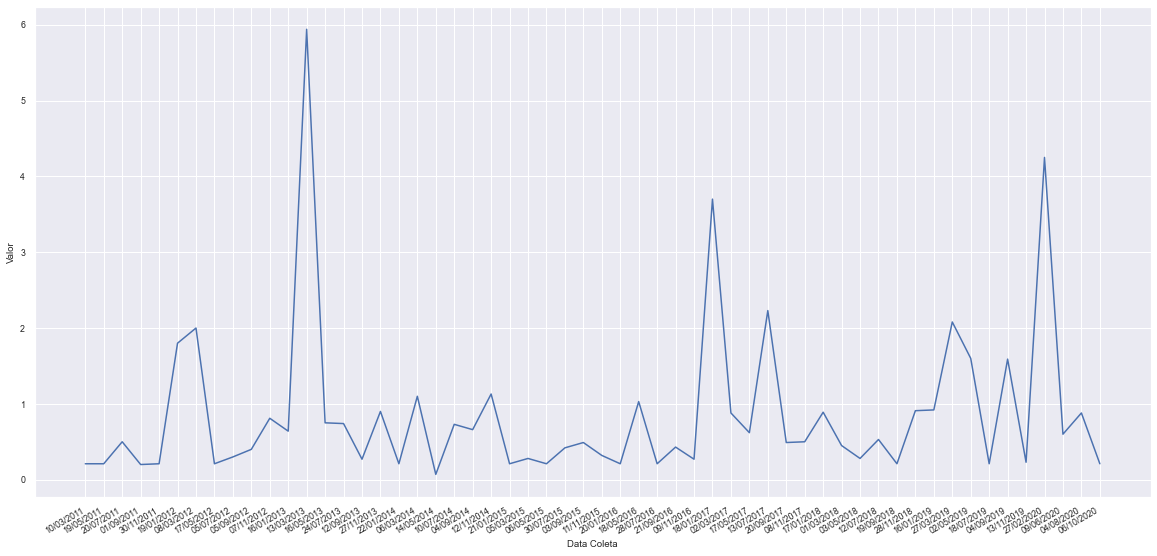

In [129]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.lineplot(
    data=O2_table,
    x="Data Coleta", y="Valor")
plt.gcf().autofmt_xdate()
plt.show()

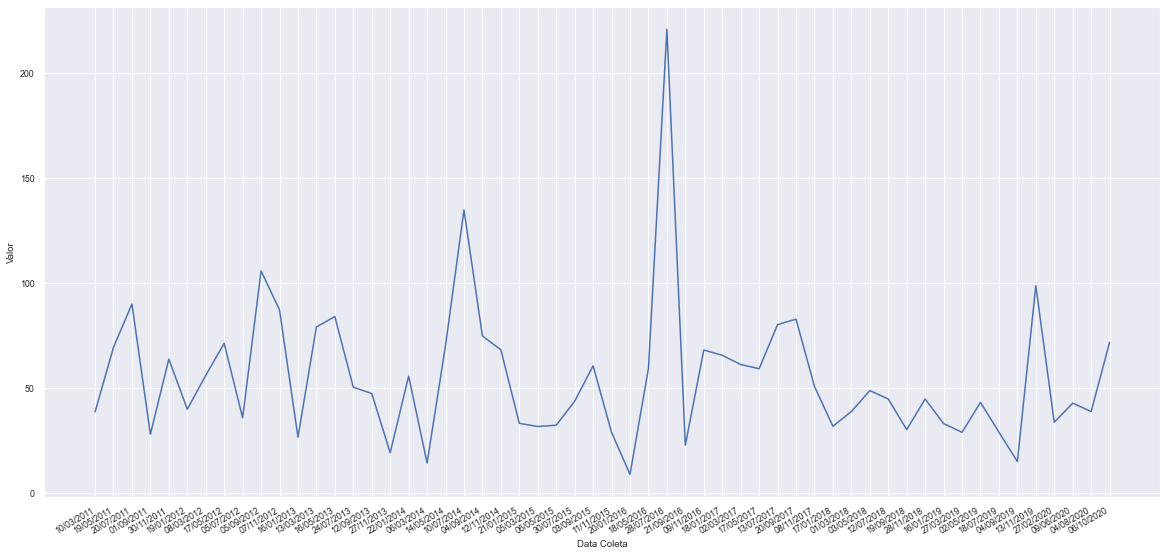

In [136]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.lineplot(
    data=Turbidez_table,
    x="Data Coleta", y="Valor")
plt.gcf().autofmt_xdate()
plt.show()

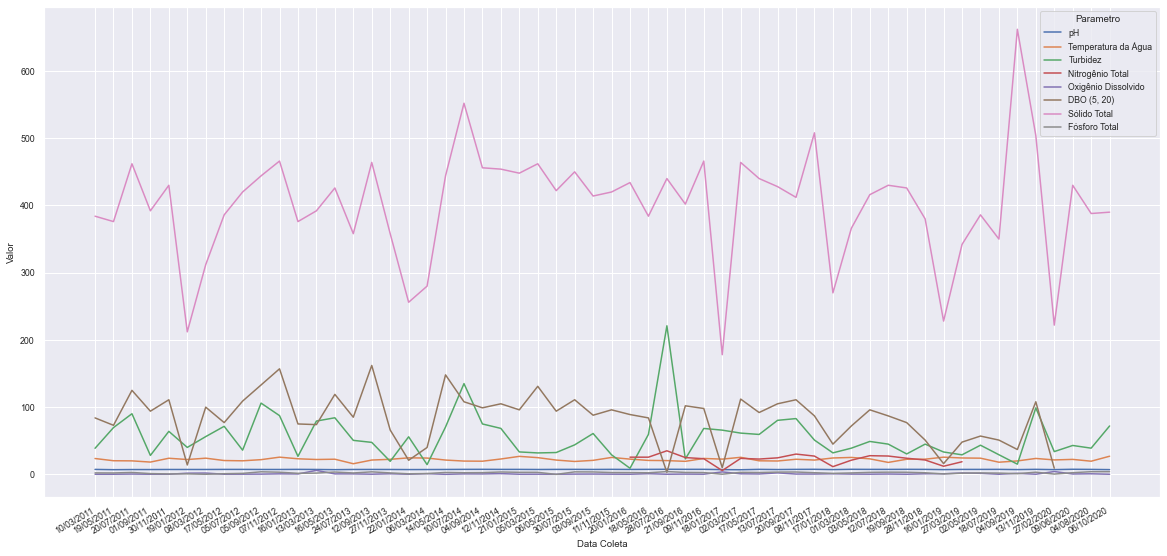

In [146]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
sns.lineplot(data=IQA_table, x="Data Coleta", y="Valor", hue="Parametro")
plt.gcf().autofmt_xdate()
#plt.savefig('todos_ind.png', dpi=300)
plt.show()
